## Imports

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Reading the Data

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv('ECG features.csv')

In [5]:
list = []

In [6]:
for i in range(20):
    list.append(2)
for i in range(4):
    list.append(1)
for i in range(4):
    list.append(0)

In [7]:
df['Output'] = list

In [8]:
df

,RRmean,SDNN,RMSSD,NNxx,pNNxx,Mean_HR,Min_HR,Max_HR,vlf,lf,hf,total_power,lf_norm,hf_norm,ratio,Output
0,0.987412,0.164159,0.102512,0.0,0.000000,60.764894,34.090909,260.869565,0.000010,0.000064,0.000163,0.059763,0.001068,0.002734,0.390845,2
1,0.527200,2.222625,3.135647,2.0,0.003315,113.808857,0.111082,285.714286,0.000015,0.000057,0.000118,0.015532,0.003668,0.007581,0.483805,2
2,0.941841,4.445674,6.279421,2.0,0.006010,63.705017,0.073945,285.714286,0.000030,0.000079,0.000267,0.198022,0.000401,0.001349,0.297032,2
3,0.953174,0.133574,0.109427,0.0,0.000000,62.947577,7.389163,285.714286,0.000092,0.000345,0.000407,0.113936,0.003029,0.003571,0.848258,2
4,0.945358,0.086209,0.040441,0.0,0.000000,63.468039,18.927445,260.869565,0.038125,0.076532,0.015838,0.372621,0.205387,0.042506,4.832013,2
5,0.886794,0.221676,0.178506,0.0,0.000000,67.659457,18.633540,285.714286,0.000010,0.000035,0.000052,0.016569,0.002124,0.003168,0.670344,2
6,0.816726,0.129421,0.094985,0.0,0.000000,73.464066,23.346304,136.363636,0.010763,0.015626,0.004948,0.344936,0.045301,0.014346,3.157847,2
7,0.729709,0.071149,0.074359,0.0,0.000000,82.224604,51.282051,285.714286,0.040793,0.077803,0.033694,0.548310,0.141896,0.061450,2.309115,2
8,0.944494,0.078787,0.088658,0.0,0.000000,63.526090,30.150754,260.869565,0.000002,0.000009,0.000072,0.034188,0.000264,0.002094,0.126142,2
9,0.959661,0.088898,0.059081,0.0,0.000000,62.522087,38.709677,285.714286,0.009969,0.025879,0.010824,0.136355,0.189790,0.079383,2.390826,2


In [9]:
X = df.iloc[:,0:len(df.columns)-1]
Y = df.iloc[:,-1]

# Feature Selection

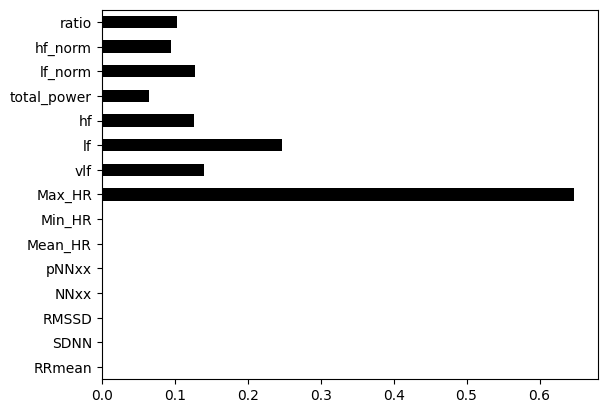

In [10]:
## Information Gain ##
importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance , df.columns[0:len(df.columns)-1])

feat_importance.plot(kind='barh', color = 'black')
plt.show()

### Wrapper Methods

In [11]:
## Forward Feature Elimination ##
from sklearn.feature_selection import SequentialFeatureSelector


clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, Y)

y_pred = clf.predict(X)


sfs = SequentialFeatureSelector(clf, n_features_to_select=2)
sfs.fit(X, Y)

sfs.get_support()


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warni

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False])

### Intrinsic (Embedded) Methods

In [17]:
## Random Forest Importance ##
rf = RandomForestClassifier(n_estimators=340)
rf.fit(X, Y)
importance=rf.feature_importances_
feature=pd.DataFrame({"features":pd.DataFrame(X).columns,"importance":importance})
feature.set_index("importance")
feature=feature.sort_values("importance")
feature

,features,importance
7,Max_HR,0.005338
4,pNNxx,0.025824
3,NNxx,0.028117
1,SDNN,0.041845
2,RMSSD,0.043343
6,Min_HR,0.057608
12,lf_norm,0.064850
8,vlf,0.075087
14,ratio,0.078152
0,RRmean,0.078614


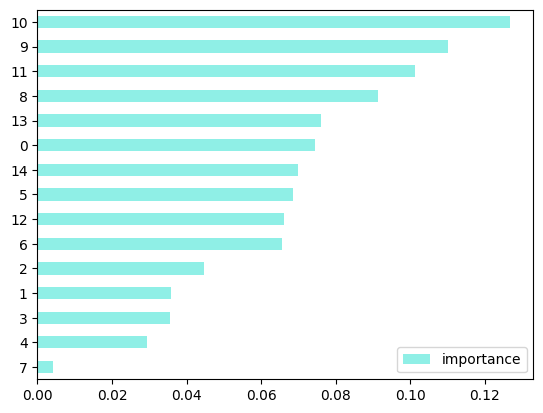

In [15]:
feature.plot(kind='barh',color=['#8FEFE6','#F6ABD4'])
plt.show()

Before dimentionality reduction: (28, 15)
After dimentionality reduction: (28, 2)


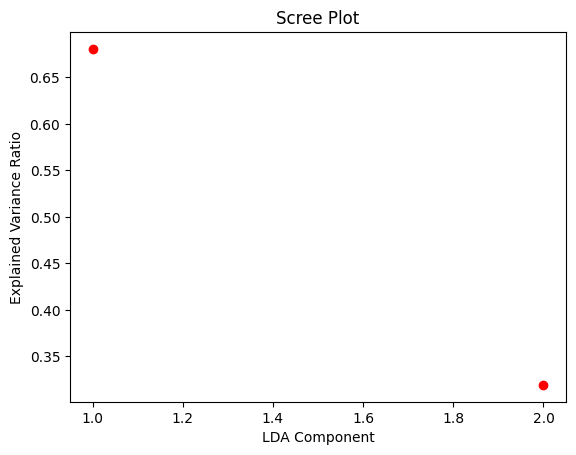

In [13]:
#feature dimentionality using LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

X_lda = lda.fit_transform(X, Y)
print(f"Before dimentionality reduction: {X.shape}" )

print(f"After dimentionality reduction: {X_lda.shape}")

plt.plot(np.arange(1, lda.explained_variance_ratio_.size+1), lda.explained_variance_ratio_, 'ro', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('LDA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

